In [41]:
import numpy as np
import numpy.linalg as nlin
import scipy.linalg
#from scs import *
from cvxpy import *

In [42]:
def minimize(Y, index_set, n, m,  r, er_tol):
    M = np.copy(Y) 
    S = Semidef(2*n, 2*n)
    missed = np.zeros((n, n), dtype = bool)
    for i in index_set:
        missed[i] = True
    #print missed
    ok_mask = np.ones((2*n, 2*n), dtype =  bool)
    ok_mask[:n, n:] = ~missed
    ok_mask[n:, :n] = ~(missed.T)
    #print ok_mask
    masked_M = mul_elemwise(ok_mask[:n, n:], M)
    masked_S = mul_elemwise(ok_mask, S)
    abs_diff = abs(masked_S[:n, n:] - masked_M)
    constraints = [abs_diff <= er_tol]
    #constraints.append(S >> 0)
    obj = Minimize(trace(S))
    prob = Problem(obj, constraints)
    prob.solve(solver = CVXOPT, verbose = False)
    if prob.status == 'optimal':
        return np.array(S.value[:n, n:]), nlin.norm(M - np.array(S.value[:n, n:]), 'fro')/nlin.norm(M, 'fro')
    return prob.status


def minimize2(M, index_set, n, m,  r, er_tol):
    #M = np.copy(Y) 
    X = Variable(n, n)
    missed = np.zeros((n, n), dtype = bool)
    for i in index_set:
        missed[i] = True
    #print missed
    ok_mask = ~missed
    #print ok_mask
    masked_M = mul_elemwise(ok_mask, M)
    masked_X = mul_elemwise(ok_mask, X)
    abs_diff = abs(masked_X - masked_M)
    constraints = [abs_diff <= er_tol]
    #constraints.append(S >> 0)
    obj = Minimize(norm(X, 'nuc'))
    prob = Problem(obj, constraints)
    prob.solve(solver = SCS, verbose = False)
    if prob.status == 'optimal':
        return np.array(X.value), nlin.norm(M - np.array(X.value), 'fro')/nlin.norm(M, 'fro')
    return prob.status


In [53]:
r = 1
print r*(2*n-r)
n = 40
A = np.random.randn(n,n)
er_tol = 1e-3

79


In [65]:
5*(80-5)


375

In [77]:
r = 5
u,s,v = nlin.svd(A)
s[r:] = 1e-5
erlist= []
A = np.dot(u, np.dot(np.diag(s),v))
mlist=[375, 400, 500, 600, 700, 750, 800, 850, 900, 1000, 1100, 1200, 1300, 1600]
for m in mlist:
    index_set = np.random.choice(n**2, n**2-m, replace = False)
    index_set = [np.unravel_index(i, (n,n)) for i in index_set]
    X, error = minimize2(A, index_set, n, m,  r, er_tol)
    print error
    erlist.append(error)

0.122695819854
0.0926910778562
0.00236377201709
0.00229017852585
0.00230790460238
0.0022661130678
0.00230576939532
0.00226555481127
0.00215223453993
0.00214612244442
0.00208493753447
0.00214806218914
0.00212348578622
0.00210263431521


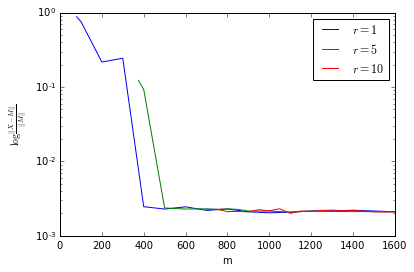

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.semilogy(np.array(mlist1), np.array(erlist1), label = r'$r =1$')
plt.semilogy(np.array(mlist), np.array(erlist), label = r'$r = 5$' )
plt.semilogy(np.array(mlist2), np.array(erlist2), label = r'$r =10$', color ='r')

plt.xlabel('m')
plt.ylabel(r'$\log\frac{\|X-M\|}{\|M\|}$')
plt.legend()
plt.savefig('dependence_of_m_r=1_5_10.png')

In [36]:
n = 40
niter = 25
er_tol = 1e-3
rlist = [1, 5, 10, 20, 30, 40]
mlist = []
k = 0
for r in rlist:
    #print r
    mlist.append([])
    i = r*(2*n-r)
    while (i <= n*n):
        mlist[k].append(i)
        i += 30
    k += 1

In [10]:
errors = []
for k in range(len(rlist)):
    errors.append([])
import time
M = np.random.randn(n,n)
for k in xrange(len(rlist)):
    ms = mlist[k]
    r = rlist[k]
    i = 2*r*n-r**2
    for m in ms:
        print 'm ={}, r={}'.format(m, r)
        res = 0.0
        t1= time.clock()
        u,s,v = nlin.svd(M)
        s[r:] = 1e-5
        M = np.dot(u, np.dot(np.diag(s),v))
        index_set = np.random.choice(n**2, n**2-m, replace = False)
        index_set = [np.unravel_index(i, (n,n)) for i in index_set]
        X, error = minimize2(M, index_set, n, m,  r, er_tol)
        errors[k].append(error)
        print 'error', error
        t2= time.clock()
        print 'time:', t2-t1
        
        
  

m =79, r=1
error 0.84535661984
time: 13.729687
m =109, r=1
error 0.797346977706
time: 14.968817
m =139, r=1
error 0.568401174961
time: 10.9749
m =169, r=1
error 0.535512715911
time: 15.778109
m =199, r=1
error 0.329989794068
time: 12.808582
m =229, r=1
error 0.0982685768465
time: 10.640399
m =259, r=1
error 0.234949610342
time: 13.054168
m =289, r=1
error 0.135847625814
time: 11.150681
m =319, r=1
error 0.0178194191537
time: 13.47196
m =349, r=1
error 0.0889283244961
time: 13.888388
m =379, r=1
error 0.0496281832462
time: 11.308439
m =409, r=1
error 0.00240789075476
time: 12.121155
m =439, r=1
error 0.0141039654946
time: 12.812628
m =469, r=1
error 0.0022682449568
time: 11.851256
m =499, r=1
error 0.147128014463
time: 11.485089
m =529, r=1
error 0.00200006236784
time: 13.47373
m =559, r=1
error 0.00217789162411
time: 10.455213
m =589, r=1
error 0.00210061238169
time: 11.924391
m =619, r=1
error 0.00209010558348
time: 12.412506
m =649, r=1
error 0.0128671433965
time: 12.131903
m =679, r

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


TypeError: int() argument must be a string or a number, not 'tuple'

## For diagrams

In [37]:
n = 50
niter = 25
er_tol = 1e-3
rlist = [1, 5, 10, 20, 30, 40, 50]
mlist = []
k = 0
for r in rlist:
    #print r
    mlist.append([])
    i = r*(2*n-r)
    while (i <= n*n):
        mlist[k].append(i)
        i += 30
    k += 1

In [38]:
import time
recovery_rates = []
xaxis = []
yaxis = []
for k in xrange(len(rlist)):
    ms = mlist[k]
    r = rlist[k]
    i = 2*r*n-r**2
    for m in ms:
        print 'm ={}, r={}'.format(m, r)
        res = 0.0
        t1= time.clock()
        for iteration in xrange(niter):
            #print 'iteration#', iteration
            M = np.random.randn(n,n)
            u,s,v = nlin.svd(M)
            s[r:] = 1e-5
            M = np.dot(u, np.dot(np.diag(s),v))
            index_set = np.random.choice(n**2, n**2-m, replace = False)
            index_set = [np.unravel_index(i, (n,n)) for i in index_set]
            X, error = minimize2(M, index_set, n, m,  r, er_tol)
            #print 'error', error
            if error < 1e-2:
                res += 1.0
        t2= time.clock()
        print '10 cycles ended ', t2-t1
        xaxis.append(np.float(m)/n**2)
        yaxis.append(np.float(r*(2*n-r))/m)
        recovery_rates.append(res/niter)
  

m =99, r=1
10 cycles ended  450.750867
m =129, r=1
10 cycles ended  611.179975
m =159, r=1
10 cycles ended  656.381
m =189, r=1
10 cycles ended  625.11766
m =219, r=1
10 cycles ended  620.92484
m =249, r=1
10 cycles ended  627.646017
m =279, r=1
10 cycles ended  620.39784
m =309, r=1
10 cycles ended  649.305508
m =339, r=1
10 cycles ended  637.565861
m =369, r=1
10 cycles ended  660.822818
m =399, r=1
10 cycles ended  675.579051
m =429, r=1
10 cycles ended  655.049033
m =459, r=1
10 cycles ended  646.176692
m =489, r=1
10 cycles ended  665.375794
m =519, r=1
10 cycles ended  656.063565
m =549, r=1
10 cycles ended  642.925716
m =579, r=1
10 cycles ended  627.786593
m =609, r=1
10 cycles ended  610.022108
m =639, r=1
10 cycles ended  619.78081
m =669, r=1
10 cycles ended  618.73777
m =699, r=1
10 cycles ended  606.677705
m =729, r=1
10 cycles ended  614.511952
m =759, r=1
10 cycles ended  585.527634
m =789, r=1
10 cycles ended  591.810802
m =819, r=1
10 cycles ended  563.691275
m =849, r

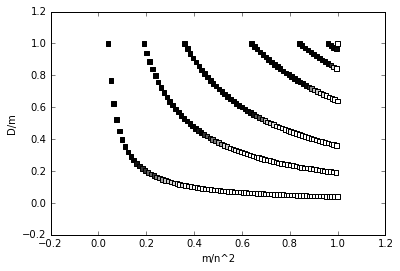

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
recovery_rates = np.array(recovery_rates)
plt.scatter(xaxis, yaxis, c = recovery_rates, s = 20, marker ='s')
plt.xlabel('m/n^2')
plt.ylabel('D/m')

plt.gray()
plt.savefig('n=50-matrix-compl.png')

In [40]:
len(recovery_rates)

253